In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression
import time
from warnings import simplefilter
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

##### Data Loading

In [2]:
#Loading the dataset

original_dataset = pd.read_csv("C:/Users/fetih.kaya/Desktop/Churn_Modelling.csv")
dataset = original_dataset.copy()

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1 - Explanatory Data Analysis

In [3]:
#General information about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


***

<font color='red'>
    
**The dataset has;**

-11 numerical and 3 categorical attributes, in total 14 columns

-10.000 rows

-no null values in entries

***

</font>

In [4]:
#Statistical summary of the dataset

dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### 1.1 - Graphical presentation of attributes

Text(0, 0.5, 'EstimatedSalary')

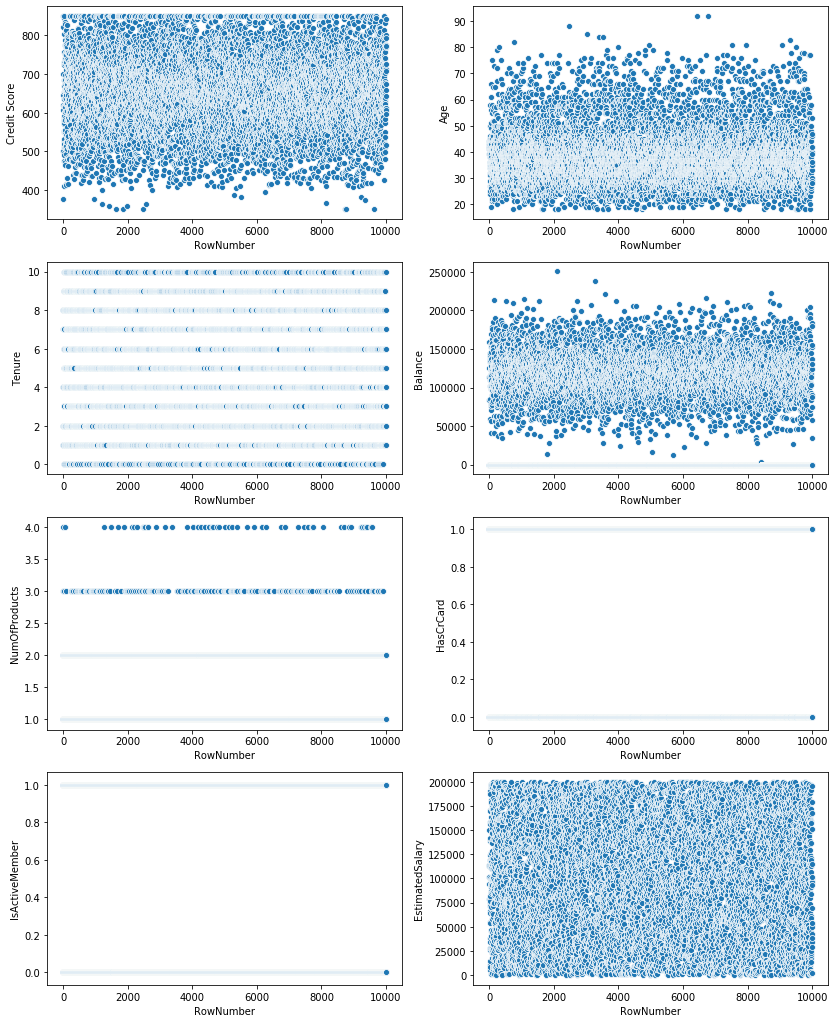

In [5]:
fig, ax = plt.subplots(4,2)
fig.set_size_inches(14, 18)

sns.scatterplot(x='RowNumber', y='CreditScore', data=dataset, ax=ax[0,0]) 
ax[0,0].set_ylabel('Credit Score')

sns.scatterplot(x='RowNumber', y='Age', data=dataset, ax=ax[0,1]) 
ax[0,1].set_ylabel('Age')

sns.scatterplot(x='RowNumber', y='Tenure', data=dataset, ax=ax[1,0]) 
ax[1,0].set_ylabel('Tenure')

sns.scatterplot(x='RowNumber', y='Balance', data=dataset, ax=ax[1,1]) 
ax[1,1].set_ylabel('Balance')

sns.scatterplot(x='RowNumber', y='NumOfProducts', data=dataset, ax=ax[2,0]) 
ax[2,0].set_ylabel('NumOfProducts')

sns.scatterplot(x='RowNumber', y='HasCrCard', data=dataset, ax=ax[2,1]) 
ax[2,1].set_ylabel('HasCrCard')

sns.scatterplot(x='RowNumber', y='IsActiveMember', data=dataset, ax=ax[3,0]) 
ax[3,0].set_ylabel('IsActiveMember')

sns.scatterplot(x='RowNumber', y='EstimatedSalary', data=dataset, ax=ax[3,1]) 
ax[3,1].set_ylabel('EstimatedSalary')

#### 1.2 - Visualization of the histogram distribution of entries in accordance with target variable "Exited"

Text(0.5, 1.0, 'Distribution of Exits by EstimatedSalary ')

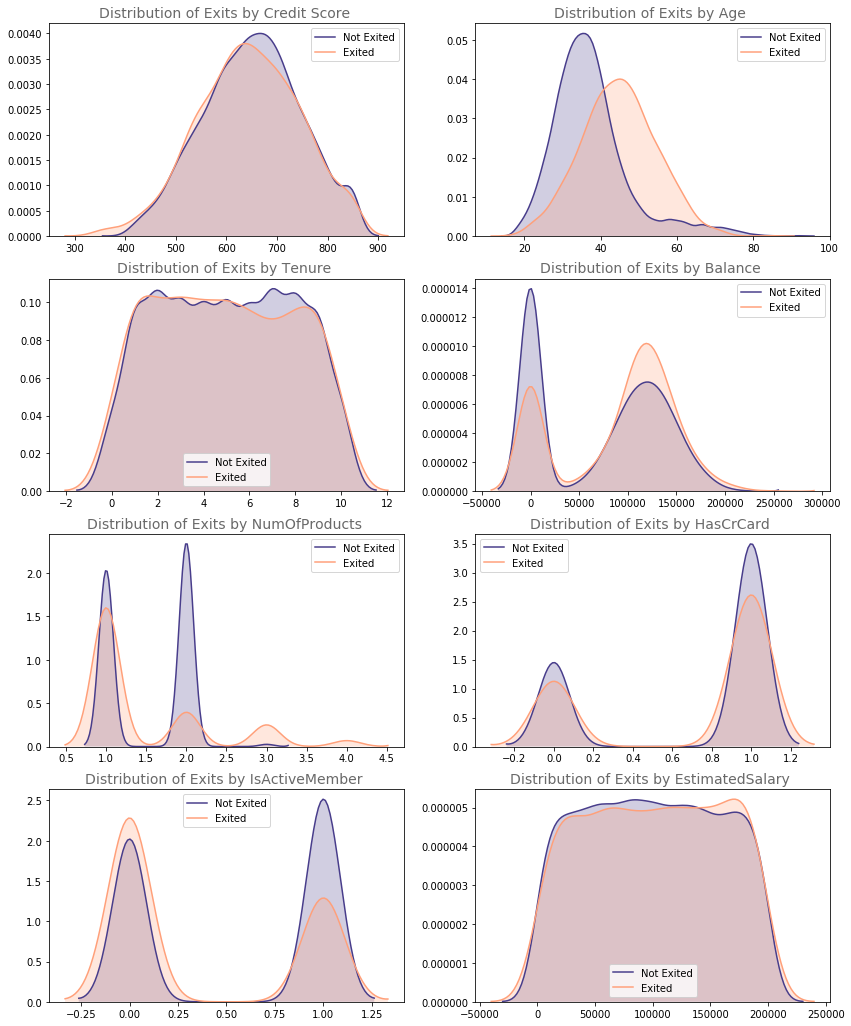

In [6]:
#Distribution of entries in accordance with attributes

fig, ax = plt.subplots(4,2)
fig.set_size_inches(14, 18)

sns.kdeplot(dataset.query('CreditScore >= 0 & Exited == 0')['CreditScore'],
             color='darkslateblue', shade=True, label='Not Exited', ax=ax[0,0])
sns.kdeplot(dataset.query('CreditScore >= 0 & Exited == 1')['CreditScore'],
             color='lightsalmon', shade=True, label='Exited', ax=ax[0,0])
ax[0,0].set_title('Distribution of Exits by Credit Score ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('Age >= 0 & Exited == 0')['Age'],
             color='darkslateblue', shade=True, label='Not Exited', ax=ax[0,1])
sns.kdeplot(dataset.query('Age >= 0 & Exited == 1')['Age'],
             color='lightsalmon', shade=True, label='Exited', ax=ax[0,1])
ax[0,1].set_title('Distribution of Exits by Age ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('Tenure >= 0 & Exited == 0')['Tenure'],
             color='darkslateblue', shade=True, label='Not Exited', ax=ax[1,0])
sns.kdeplot(dataset.query('Tenure >= 0 & Exited == 1')['Tenure'],
             color='lightsalmon', shade=True, label='Exited', ax=ax[1,0])
ax[1,0].set_title('Distribution of Exits by Tenure ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('Balance >= 0 & Exited == 0')['Balance'],
             color='darkslateblue', shade=True, label='Not Exited', ax=ax[1,1])
sns.kdeplot(dataset.query('Balance >= 0 & Exited == 1')['Balance'],
             color='lightsalmon', shade=True, label='Exited', ax=ax[1,1])
ax[1,1].set_title('Distribution of Exits by Balance ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('NumOfProducts >= 0 & Exited == 0')['NumOfProducts'],
             color='darkslateblue', shade=True, label='Not Exited', ax=ax[2,0])
sns.kdeplot(dataset.query('NumOfProducts >= 0 & Exited == 1')['NumOfProducts'],
             color='lightsalmon', shade=True, label='Exited', ax=ax[2,0])
ax[2,0].set_title('Distribution of Exits by NumOfProducts ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('HasCrCard >= 0 & Exited == 0')['HasCrCard'],
             color='darkslateblue', shade=True, label='Not Exited', ax=ax[2,1])
sns.kdeplot(dataset.query('HasCrCard >= 0 & Exited == 1')['HasCrCard'],
             color='lightsalmon', shade=True, label='Exited', ax=ax[2,1])
ax[2,1].set_title('Distribution of Exits by HasCrCard ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('IsActiveMember >= 0 & Exited == 0')['IsActiveMember'],
             color='darkslateblue', shade=True, label='Not Exited', ax=ax[3,0])
sns.kdeplot(dataset.query('IsActiveMember >= 0 & Exited == 1')['IsActiveMember'],
             color='lightsalmon', shade=True, label='Exited', ax=ax[3,0])
ax[3,0].set_title('Distribution of Exits by IsActiveMember ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('EstimatedSalary >= 0 & Exited == 0')['EstimatedSalary'],
             color='darkslateblue', shade=True, label='Not Exited', ax=ax[3,1])
sns.kdeplot(dataset.query('EstimatedSalary >= 0 & Exited == 1')['EstimatedSalary'],
             color='lightsalmon', shade=True, label='Exited', ax=ax[3,1])
ax[3,1].set_title('Distribution of Exits by EstimatedSalary ', color='dimgrey', size=14)

#### 1.3 - Visualization of the boxplot distribution of entries in accordance with target variable "Exited"

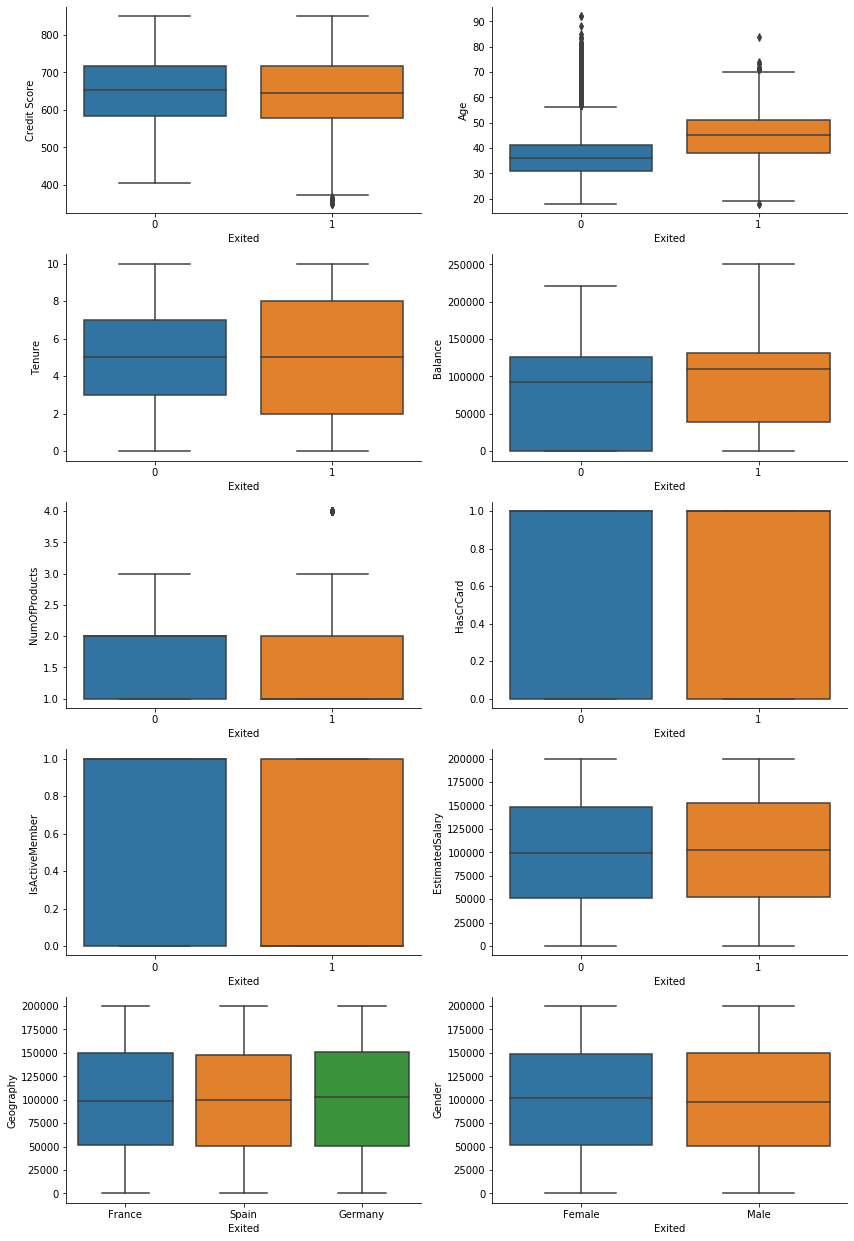

In [7]:
#Boxplot distribution of attributes

fig, ax = plt.subplots(5,2)
fig.set_size_inches(14, 22)

sns.boxplot(x='Exited', y='CreditScore', data=dataset, ax=ax[0,0]) 
ax[0,0].set_xlabel('Exited') 
ax[0,0].set_ylabel('Credit Score')
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)


sns.boxplot(x='Exited', y='Age', data=dataset, ax=ax[0,1]) 
ax[0,1].set_xlabel('Exited') 
ax[0,1].set_ylabel('Age')
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)


sns.boxplot(x='Exited', y='Tenure', data=dataset, ax=ax[1,0]) 
ax[1,0].set_xlabel('Exited') 
ax[1,0].set_ylabel('Tenure')
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)


sns.boxplot(x='Exited', y='Balance', data=dataset, ax=ax[1,1]) 
ax[1,1].set_xlabel('Exited') 
ax[1,1].set_ylabel('Balance')
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)


sns.boxplot(x='Exited', y='NumOfProducts', data=dataset, ax=ax[2,0]) 
ax[2,0].set_xlabel('Exited') 
ax[2,0].set_ylabel('NumOfProducts')
ax[2,0].spines['right'].set_visible(False)
ax[2,0].spines['top'].set_visible(False)


sns.boxplot(x='Exited', y='HasCrCard', data=dataset, ax=ax[2,1]) 
ax[2,1].set_xlabel('Exited') 
ax[2,1].set_ylabel('HasCrCard')
ax[2,1].spines['right'].set_visible(False)
ax[2,1].spines['top'].set_visible(False)


sns.boxplot(x='Exited', y='IsActiveMember', data=dataset, ax=ax[3,0]) 
ax[3,0].set_xlabel('Exited') 
ax[3,0].set_ylabel('IsActiveMember')
ax[3,0].spines['right'].set_visible(False)
ax[3,0].spines['top'].set_visible(False)


sns.boxplot(x='Exited', y='EstimatedSalary', data=dataset, ax=ax[3,1]) 
ax[3,1].set_xlabel('Exited') 
ax[3,1].set_ylabel('EstimatedSalary')
ax[3,1].spines['right'].set_visible(False)
ax[3,1].spines['top'].set_visible(False)


sns.boxplot(x='Geography', y='EstimatedSalary', data=dataset, ax=ax[4,0]) 
ax[4,0].set_xlabel('Exited') 
ax[4,0].set_ylabel('Geography')
ax[4,0].spines['right'].set_visible(False)
ax[4,0].spines['top'].set_visible(False)


sns.boxplot(x='Gender', y='EstimatedSalary', data=dataset, ax=ax[4,1]) 
ax[4,1].set_xlabel('Exited') 
ax[4,1].set_ylabel('Gender')
ax[4,1].spines['right'].set_visible(False)
ax[4,1].spines['top'].set_visible(False)

***

<font color='red'>
    
**The distribution of entries from both histogram and boxplot graphs shows;**

-Age, Balance and NumOfProducts attributes have effect on exiting decision

-While CreditScore, Tenure, HasCrCard, IsActiveMember, EstimatedSalary, Geography and Gender attributes do not have an importatnt effect on exiting decision 

***

</font>

# 2 - Data Preprocessing

#### 2.1 - Drop unimportant columns

In [8]:
dataset = dataset.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

***

<font color='red'>
    
**'RowNumber', 'CustomerId' and 'Surname' columns do not carry important information for modelling, they refer just individual persons**

***

</font>

#### 2.2 - Duplicated Entries

In [9]:
#Duplicated data search

dataset.duplicated().value_counts()

False    10000
dtype: int64

***

<font color='red'>
    
**There are no duplicated entries in the dataset**

***

</font>

#### 2.3 - Outliers - it can be seen from boxplot visualiztion, there are some outliers

In [10]:
#Removing outliers

#For 'CreditScore' attribute

Q1 = dataset.CreditScore.quantile(q=0.25)
Q3 = dataset.CreditScore.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['CreditScore'] > minimum) & (dataset['CreditScore'] < maximum)]


#For 'Age' attribute

Q1 = dataset.Age.quantile(q=0.25)
Q3 = dataset.Age.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['Age'] > minimum) & (dataset['Age'] < maximum)]


#For 'Tenure' attribute

Q1 = dataset.Tenure.quantile(q=0.25)
Q3 = dataset.Tenure.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['Tenure'] > minimum) & (dataset['Tenure'] < maximum)]


#For 'Balance' attribute

Q1 = dataset.Balance.quantile(q=0.25)
Q3 = dataset.Balance.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['Balance'] > minimum) & (dataset['Balance'] < maximum)]


#For 'NumOfProducts' attribute

Q1 = dataset.NumOfProducts.quantile(q=0.25)
Q3 = dataset.NumOfProducts.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['NumOfProducts'] > minimum) & (dataset['NumOfProducts'] < maximum)]


#For 'HasCrCard' attribute

Q1 = dataset.HasCrCard.quantile(q=0.25)
Q3 = dataset.HasCrCard.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['HasCrCard'] > minimum) & (dataset['HasCrCard'] < maximum)]


#For 'IsActiveMember' attribute

Q1 = dataset.IsActiveMember.quantile(q=0.25)
Q3 = dataset.IsActiveMember.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['IsActiveMember'] > minimum) & (dataset['IsActiveMember'] < maximum)]


#For 'EstimatedSalary' attribute

Q1 = dataset.EstimatedSalary.quantile(q=0.25)
Q3 = dataset.EstimatedSalary.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['EstimatedSalary'] > minimum) & (dataset['EstimatedSalary'] < maximum)]


dataset = dataset.reset_index(drop=True)

***

<font color='red'>
    
**There are 9.515 rows remaining instead of 10.000 after removal of outliers**

***

</font>

#### 2.4 - Removing null values

In [11]:
#Search for the names of each sub-groups of attributes

print(dataset.CreditScore.unique())
print(dataset.Age.unique())
print(dataset.Tenure.unique())
print(dataset.Balance.unique())
print(dataset.NumOfProducts.unique())
print(dataset.HasCrCard.unique())
print(dataset.IsActiveMember.unique())
print(dataset.EstimatedSalary.unique())
print(dataset.Geography.unique())
print(dataset.Gender.unique())

[619 608 502 699 850 645 822 501 684 528 497 476 549 635 616 653 587 726
 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490 804
 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725 614
 742 687 555 603 751 581 735 661 675 813 657 604 519 664 678 757 416 665
 777 543 506 493 750 729 646 647 808 524 769 730 515 773 814 710 413 623
 738 622 785 605 479 685 538 562 721 628 668 828 674 625 432 770 758 795
 686 789 589 461 584 579 663 682 793 691 485 650 754 535 716 539 706 586
 631 717 800 683 704 615 667 484 480 578 512 606 597 778 514 525 715 580
 807 521 759 516 711 618 643 671 689 620 676 572 695 592 567 670 694 547
 594 610 767 763 712 703 662 523 772 545 634 739 771 544 696 766 727 693
 557 531 498 651 791 733 811 707 714 782 775 799 602 744 588 747 583 681
 511 627 731 629 438 642 806 474 559 429 680 749 734 644 626 659 649 805
 718 840 630 654 762 568 613 522 737 648 443 540 460 593 801 611 802 745
 483 690 492 709 705 752 701 537 487 596 702 486 72

***

<font color='red'>
    
**There are no noisy entries in the dataset**

***

</font>

#### 2.5 - Correlation

In [12]:
#Chi2 correlation search between independent categorical and taget variables 

le = LabelEncoder()
X = dataset.loc[:,'CreditScore':'EstimatedSalary']
X = X.select_dtypes(include=np.object) # select string columns
X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(dataset.loc[:,'Exited'])
chi2, pval=feature_selection.chi2(X, y)
sorted_idx = np.argsort(chi2)[::-1]
sorted_vals = np.sort(chi2)[::-1]


d = {"features":X.columns[sorted_idx], "values":sorted_vals, "p-values":pval[sorted_idx]}
df = pd.DataFrame(d)
df

,features,values,p-values
0,Gender,46.167533,1.085611e-11
1,Geography,11.349421,7.547149e-04


***

<font color='red'>
    
**All the categorical attributes have statistical significance because their p-values are less than 5%**

***

</font>

In [13]:
#Correlation between numerical attributes and income level

X = dataset
X = dataset.select_dtypes(include=np.number) # select numeric columns

y = dataset.loc[:,'Exited']
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

sorted_idx = np.argsort(selector.scores_)[::-1]
sorted_vals = np.sort(selector.scores_)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals, "p-values":selector.pvalues_[sorted_idx]}
df = pd.DataFrame(d)
df

C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,features,values,p-values
0,Exited,inf,0.000000e+00
1,Age,1371.425453,1.458945e-280
2,IsActiveMember,198.928686,1.008215e-44
3,Balance,124.960785,7.847869e-29
4,NumOfProducts,114.246296,1.627033e-26
5,CreditScore,2.554354,1.100240e-01
6,Tenure,1.956955,1.618720e-01
7,EstimatedSalary,0.875434,3.494789e-01
8,HasCrCard,0.402312,5.259130e-01


***

<font color='red'>
    
**Age, IsActiveMember, Balance and NumOfProducts attributes have statistical significance because their p-values are less than 5%. However, other attributes are statistically insignificant**

This was seen from the visualisations made before.

Additionally, the most correlated numerical attributes with income level; Age, IsActiveMember, Balance and NumOfProducts respectively.

***

</font>

#### 2.6 - Data nomralization for 'CreditScore' attribute

In [14]:
#min credit score is 350 and max credit score is 850; settle the entries between 0 and 1 by normalization

CreditScore = np.array([dataset.CreditScore])
CreditScore = preprocessing.normalize(CreditScore)

dataset = dataset.drop(['CreditScore'], axis=1)

CreditScore = pd.DataFrame(CreditScore.T, columns=['CreditScore'])

dataset  = pd.concat([dataset, CreditScore], axis=1)

#### 2.7 - Assigning dummy variables to 'Geography' and 'Gender' attributes

In [15]:
#Dummy for 'Geography' attribute

Geography = pd.get_dummies(dataset['Geography'])
dataset = dataset.drop(['Geography'], axis=1)
dataset = pd.concat([dataset,Geography], axis=1)

#Dummy for 'Gender' attribute

Gender = pd.get_dummies(dataset['Gender'])
dataset = dataset.drop(['Gender'], axis=1)
dataset = pd.concat([dataset,Gender], axis=1)

#### 2.8 - Data discritization for 'Age' attribute

In [16]:
#Seperating 0-20, 20-30, 30-40, 40-50 and 50- as sub groups 

dataset["AgeGroup"] = ""

for i in range(dataset.shape[0]):
    if (0 < dataset.loc[i, 'Age'] <= 20):
        dataset.loc[i, 'AgeGroup'] = 0
        continue
    elif (20 < dataset.loc[i, 'Age'] <= 30):
        dataset.loc[i, 'AgeGroup'] = 1
        continue
    elif (30 < dataset.loc[i, 'Age'] <= 40):
        dataset.loc[i, 'AgeGroup'] = 2
        continue
    elif (40 < dataset.loc[i, 'Age'] <= 50):
        dataset.loc[i, 'AgeGroup'] = 3
        continue
    elif (50 < dataset.loc[i, 'Age']):
        dataset.loc[i, 'AgeGroup'] = 4
        continue
   
dataset = dataset.drop(['Age'], axis=1)

dataset['AgeGroup'] = dataset['AgeGroup'].astype('int')

#### 2.9 - Log transformation of 'Balance' and 'Estimated Salary' attributes 

In [17]:
#Making 0 values 0.001 to prevent the -infinity results
for i in range(dataset.shape[0]):
    if (dataset.loc[i, 'Balance'] == 0):
        dataset.loc[i, 'Balance'] = 0.001


dataset['Balance'] = np.log(dataset.Balance)
dataset['EstimatedSalary'] = np.log(dataset.EstimatedSalary)

#### 2.10 - Divide the dataset as independent variables and target variable

In [18]:
target = dataset.Exited
dataset = dataset.drop(['Exited'], axis=1)

# 3 - Data Modelling

#### 3.1 - Application of Decision Tree Algorithm - Model 1

In [19]:
#Aplly 5-fold cross validation for more reliable results

accuracy_dec_tree_train_tot = 0
precision_dec_tree_train_tot = 0
recall_dec_tree_train_tot = 0
fmeasure_dec_tree_train_tot = 0
time_dec_tree_train_tot = 0

accuracy_dec_tree_test_tot = 0
precision_dec_tree_test_tot = 0
recall_dec_tree_test_tot = 0
fmeasure_dec_tree_test_tot = 0
time_dec_tree_test_tot = 0

n_splits = 5

#Splitting train and test datasets, 80% of dataset is used for training and 20% for testing
for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(dataset):

    dataset_train = dataset.iloc[train_index,:]; dataset_train = dataset_train.reset_index(drop=True);
    target_train = target.iloc[train_index]  ; target_train = target_train.reset_index(drop=True);
    dataset_test = dataset.iloc[test_index,:]  ; dataset_test = dataset_test.reset_index(drop=True);
    target_test = target.iloc[test_index]    ; target_test = target_test.reset_index(drop=True);
    
#Decision tree algorithm application - train set   
    tic_dec_tree_train = time.time()

    dec_tree = tree.DecisionTreeClassifier()
    model_dec_tree = dec_tree.fit(dataset_train, target_train)
    dec_tree_predictions_train = model_dec_tree.predict(dataset_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_dec_tree_train = time.time()
    time_dec_tree_train = toc_dec_tree_train-tic_dec_tree_train
    
#Decision tree algorithm's classification report - train set
    TP_dec_tree_train = 0
    TN_dec_tree_train = 0
    FP_dec_tree_train = 0
    FN_dec_tree_train = 0
    
    for i in range (len(dec_tree_predictions_train)):
        if (target_train[i] == 1 and dec_tree_predictions_train[i] == 1):
            TP_dec_tree_train += 1
        if (target_train[i] == 0 and dec_tree_predictions_train[i] == 0):
            TN_dec_tree_train += 1
        if (target_train[i] == 0 and dec_tree_predictions_train[i] == 1):
            FP_dec_tree_train += 1    
        if (target_train[i] == 1 and dec_tree_predictions_train[i] == 0):
            FN_dec_tree_train += 1       
            
    accuracy_dec_tree_train = ((TP_dec_tree_train + TN_dec_tree_train) / (TP_dec_tree_train + TN_dec_tree_train + FP_dec_tree_train + FN_dec_tree_train))
    precision_dec_tree_train = ((TP_dec_tree_train) / (TP_dec_tree_train + FP_dec_tree_train))
    recall_dec_tree_train = ((TP_dec_tree_train) / (TP_dec_tree_train + FN_dec_tree_train))
    fmeasure_dec_tree_train = (2 * precision_dec_tree_train * recall_dec_tree_train) / (precision_dec_tree_train + recall_dec_tree_train) 
   
    accuracy_dec_tree_train_tot += accuracy_dec_tree_train
    precision_dec_tree_train_tot += precision_dec_tree_train
    recall_dec_tree_train_tot += recall_dec_tree_train
    fmeasure_dec_tree_train_tot += fmeasure_dec_tree_train
    time_dec_tree_train_tot += time_dec_tree_train
    
    simplefilter(action='ignore', category=FutureWarning)
    
#Decision tree algorithm application - test set   
    tic_dec_tree_test = time.time()

    dec_tree_test = tree.DecisionTreeClassifier()
    model_dec_tree = dec_tree_test.fit(dataset_train, target_train)
    dec_tree_predictions_test = model_dec_tree.predict(dataset_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_dec_tree_test = time.time()
    time_dec_tree_test = toc_dec_tree_test-tic_dec_tree_test
    
#Decision tree algorithm's classification report - test set
    TP_dec_tree_test = 0
    TN_dec_tree_test = 0
    FP_dec_tree_test = 0
    FN_dec_tree_test = 0
    
    for i in range (len(dec_tree_predictions_test)):
        if (target_test[i] == 1 and dec_tree_predictions_test[i] == 1):
            TP_dec_tree_test += 1
        if (target_test[i] == 0 and dec_tree_predictions_test[i] == 0):
            TN_dec_tree_test += 1
        if (target_test[i] == 0 and dec_tree_predictions_test[i] == 1):
            FP_dec_tree_test += 1    
        if (target_test[i] == 1 and dec_tree_predictions_test[i] == 0):
            FN_dec_tree_test += 1       
            
    accuracy_dec_tree_test = ((TP_dec_tree_test + TN_dec_tree_test) / (TP_dec_tree_test + TN_dec_tree_test + FP_dec_tree_test + FN_dec_tree_test))
    precision_dec_tree_test = ((TP_dec_tree_test) / (TP_dec_tree_test + FP_dec_tree_test))
    recall_dec_tree_test = ((TP_dec_tree_test) / (TP_dec_tree_test + FN_dec_tree_test))
    fmeasure_dec_tree_test = (2 * precision_dec_tree_test * recall_dec_tree_test) / (precision_dec_tree_test + recall_dec_tree_test) 
   
    accuracy_dec_tree_test_tot += accuracy_dec_tree_test
    precision_dec_tree_test_tot += precision_dec_tree_test
    recall_dec_tree_test_tot += recall_dec_tree_test
    fmeasure_dec_tree_test_tot += fmeasure_dec_tree_test
    time_dec_tree_test_tot += time_dec_tree_test
    
    simplefilter(action='ignore', category=FutureWarning)  

#Train set    
accuracy_dec_tree_train = accuracy_dec_tree_train_tot/n_splits
precision_dec_tree_train = precision_dec_tree_train_tot/n_splits
recall_dec_tree_train = recall_dec_tree_train_tot/n_splits
fmeasure_dec_tree_train = fmeasure_dec_tree_train_tot/n_splits
time_dec_tree_train = time_dec_tree_train_tot/n_splits

print("Accuracy (Train set): {0:.3f}".format(accuracy_dec_tree_train))
print("Precision (Train set): {0:.3f}".format(precision_dec_tree_train))
print("Recall (Train set): {0:.3f}".format(recall_dec_tree_train))
print("Fmeasure (Train set): {0:.3f}".format(fmeasure_dec_tree_train))
print("Time spent (Train set): {0:.3f}".format(time_dec_tree_train))
        
#Test set        
accuracy_dec_tree_test = accuracy_dec_tree_test_tot/n_splits
precision_dec_tree_test = precision_dec_tree_test_tot/n_splits
recall_dec_tree_test = recall_dec_tree_test_tot/n_splits
fmeasure_dec_tree_test = fmeasure_dec_tree_test_tot/n_splits
time_dec_tree_test = time_dec_tree_test_tot/n_splits

print("Accuracy (Test set): {0:.3f}".format(accuracy_dec_tree_test))
print("Precision (Test set): {0:.3f}".format(precision_dec_tree_test))
print("Recall (Test set): {0:.3f}".format(recall_dec_tree_test))
print("Fmeasure (Test set): {0:.3f}".format(fmeasure_dec_tree_test))
print("Time spent (Test set): {0:.3f}".format(time_dec_tree_test))

M1AccuracyTrain =accuracy_dec_tree_train
M1AccuracyTest = accuracy_dec_tree_test
M1TimeTest = time_dec_tree_test

Accuracy (Train set): 1.000
Precision (Train set): 1.000
Recall (Train set): 1.000
Fmeasure (Train set): 1.000
Time spent (Train set): 0.084
Accuracy (Test set): 0.787
Precision (Test set): 0.459
Recall (Test set): 0.480
Fmeasure (Test set): 0.469
Time spent (Test set): 0.086


#### 3.2 - Drop statistically insignificant attributes to reach a higher accuracy - Model 2

In [20]:
dataset = dataset.drop(['HasCrCard','EstimatedSalary', 'Tenure', 'CreditScore'], axis=1)

In [21]:
#Aplly 5-fold cross validation for more reliable results

accuracy_dec_tree_train_tot = 0
precision_dec_tree_train_tot = 0
recall_dec_tree_train_tot = 0
fmeasure_dec_tree_train_tot = 0
time_dec_tree_train_tot = 0

accuracy_dec_tree_test_tot = 0
precision_dec_tree_test_tot = 0
recall_dec_tree_test_tot = 0
fmeasure_dec_tree_test_tot = 0
time_dec_tree_test_tot = 0

n_splits = 5

#Splitting train and test datasets, 80% of dataset is used for training and 20% for testing
for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(dataset):

    dataset_train = dataset.iloc[train_index,:]; dataset_train = dataset_train.reset_index(drop=True);
    target_train = target.iloc[train_index]  ; target_train = target_train.reset_index(drop=True);
    dataset_test = dataset.iloc[test_index,:]  ; dataset_test = dataset_test.reset_index(drop=True);
    target_test = target.iloc[test_index]    ; target_test = target_test.reset_index(drop=True);
    
#Decision tree algorithm application - train set   
    tic_dec_tree_train = time.time()

    dec_tree = tree.DecisionTreeClassifier()
    model_dec_tree = dec_tree.fit(dataset_train, target_train)
    dec_tree_predictions_train = model_dec_tree.predict(dataset_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_dec_tree_train = time.time()
    time_dec_tree_train = toc_dec_tree_train-tic_dec_tree_train
    
#Decision tree algorithm's classification report - train set
    TP_dec_tree_train = 0
    TN_dec_tree_train = 0
    FP_dec_tree_train = 0
    FN_dec_tree_train = 0
    
    for i in range (len(dec_tree_predictions_train)):
        if (target_train[i] == 1 and dec_tree_predictions_train[i] == 1):
            TP_dec_tree_train += 1
        if (target_train[i] == 0 and dec_tree_predictions_train[i] == 0):
            TN_dec_tree_train += 1
        if (target_train[i] == 0 and dec_tree_predictions_train[i] == 1):
            FP_dec_tree_train += 1    
        if (target_train[i] == 1 and dec_tree_predictions_train[i] == 0):
            FN_dec_tree_train += 1       
            
    accuracy_dec_tree_train = ((TP_dec_tree_train + TN_dec_tree_train) / (TP_dec_tree_train + TN_dec_tree_train + FP_dec_tree_train + FN_dec_tree_train))
    precision_dec_tree_train = ((TP_dec_tree_train) / (TP_dec_tree_train + FP_dec_tree_train))
    recall_dec_tree_train = ((TP_dec_tree_train) / (TP_dec_tree_train + FN_dec_tree_train))
    fmeasure_dec_tree_train = (2 * precision_dec_tree_train * recall_dec_tree_train) / (precision_dec_tree_train + recall_dec_tree_train) 
   
    accuracy_dec_tree_train_tot += accuracy_dec_tree_train
    precision_dec_tree_train_tot += precision_dec_tree_train
    recall_dec_tree_train_tot += recall_dec_tree_train
    fmeasure_dec_tree_train_tot += fmeasure_dec_tree_train
    time_dec_tree_train_tot += time_dec_tree_train
    
    simplefilter(action='ignore', category=FutureWarning)
    
#Decision tree algorithm application - test set   
    tic_dec_tree_test = time.time()

    dec_tree_test = tree.DecisionTreeClassifier()
    model_dec_tree = dec_tree_test.fit(dataset_train, target_train)
    dec_tree_predictions_test = model_dec_tree.predict(dataset_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_dec_tree_test = time.time()
    time_dec_tree_test = toc_dec_tree_test-tic_dec_tree_test
    
#Decision tree algorithm's classification report - test set
    TP_dec_tree_test = 0
    TN_dec_tree_test = 0
    FP_dec_tree_test = 0
    FN_dec_tree_test = 0
    
    for i in range (len(dec_tree_predictions_test)):
        if (target_test[i] == 1 and dec_tree_predictions_test[i] == 1):
            TP_dec_tree_test += 1
        if (target_test[i] == 0 and dec_tree_predictions_test[i] == 0):
            TN_dec_tree_test += 1
        if (target_test[i] == 0 and dec_tree_predictions_test[i] == 1):
            FP_dec_tree_test += 1    
        if (target_test[i] == 1 and dec_tree_predictions_test[i] == 0):
            FN_dec_tree_test += 1       
            
    accuracy_dec_tree_test = ((TP_dec_tree_test + TN_dec_tree_test) / (TP_dec_tree_test + TN_dec_tree_test + FP_dec_tree_test + FN_dec_tree_test))
    precision_dec_tree_test = ((TP_dec_tree_test) / (TP_dec_tree_test + FP_dec_tree_test))
    recall_dec_tree_test = ((TP_dec_tree_test) / (TP_dec_tree_test + FN_dec_tree_test))
    fmeasure_dec_tree_test = (2 * precision_dec_tree_test * recall_dec_tree_test) / (precision_dec_tree_test + recall_dec_tree_test) 
   
    accuracy_dec_tree_test_tot += accuracy_dec_tree_test
    precision_dec_tree_test_tot += precision_dec_tree_test
    recall_dec_tree_test_tot += recall_dec_tree_test
    fmeasure_dec_tree_test_tot += fmeasure_dec_tree_test
    time_dec_tree_test_tot += time_dec_tree_test
    
    simplefilter(action='ignore', category=FutureWarning)  

#Train set    
accuracy_dec_tree_train = accuracy_dec_tree_train_tot/n_splits
precision_dec_tree_train = precision_dec_tree_train_tot/n_splits
recall_dec_tree_train = recall_dec_tree_train_tot/n_splits
fmeasure_dec_tree_train = fmeasure_dec_tree_train_tot/n_splits
time_dec_tree_train = time_dec_tree_train_tot/n_splits

print("Accuracy (Train set): {0:.3f}".format(accuracy_dec_tree_train))
print("Precision (Train set): {0:.3f}".format(precision_dec_tree_train))
print("Recall (Train set): {0:.3f}".format(recall_dec_tree_train))
print("Fmeasure (Train set): {0:.3f}".format(fmeasure_dec_tree_train))
print("Time spent (Train set): {0:.3f}".format(time_dec_tree_train))
        
#Test set        
accuracy_dec_tree_test = accuracy_dec_tree_test_tot/n_splits
precision_dec_tree_test = precision_dec_tree_test_tot/n_splits
recall_dec_tree_test = recall_dec_tree_test_tot/n_splits
fmeasure_dec_tree_test = fmeasure_dec_tree_test_tot/n_splits
time_dec_tree_test = time_dec_tree_test_tot/n_splits

print("Accuracy (Test set): {0:.3f}".format(accuracy_dec_tree_test))
print("Precision (Test set): {0:.3f}".format(precision_dec_tree_test))
print("Recall (Test set): {0:.3f}".format(recall_dec_tree_test))
print("Fmeasure (Test set): {0:.3f}".format(fmeasure_dec_tree_test))
print("Time spent (Test set): {0:.3f}".format(time_dec_tree_test))


M2AccuracyTrain =accuracy_dec_tree_train
M2AccuracyTest = accuracy_dec_tree_test
M2TimeTest = time_dec_tree_test

Accuracy (Train set): 0.967
Precision (Train set): 0.953
Recall (Train set): 0.877
Fmeasure (Train set): 0.913
Time spent (Train set): 0.039
Accuracy (Test set): 0.812
Precision (Test set): 0.524
Recall (Test set): 0.481
Fmeasure (Test set): 0.501
Time spent (Test set): 0.034


#### 3.3 - Hyperparameter Tuning

In [22]:
def report(results, n_top=30): #print all results
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [23]:
#Decision Tree random search
clf = tree.DecisionTreeClassifier()

param_grid = {"criterion": ["gini", "entropy"],
              "splitter": ["best","random"],
              "min_samples_split": [2, 5, 10, 20, 50],
              "max_depth": [None, 2, 5, 10, 20, 50, 100],
              "max_features": [None, "auto", "sqrt", "log2"]
             }

n_iter_search = 20

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(dataset, target)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 2.06 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.854 (std: 0.008)
Parameters: {'splitter': 'random', 'min_samples_split': 20, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.853 (std: 0.006)
Parameters: {'splitter': 'random', 'min_samples_split': 20, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.851 (std: 0.005)
Parameters: {'splitter': 'random', 'min_samples_split': 50, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'gini'}

Model with rank: 4
Mean validation score: 0.850 (std: 0.009)
Parameters: {'splitter': 'best', 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}

Model with rank: 5
Mean validation score: 0.849 (std: 0.006)
Parameters: {'splitter': 'best', 'min_samples_split': 50, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}

Model w

#### 3.4 - Apply Decision Tree Algorithm with hyperparameter tuning - Model 3

In [25]:
#Aplly 5-fold cross validation for more reliable results

accuracy_dec_tree_train_tot = 0
precision_dec_tree_train_tot = 0
recall_dec_tree_train_tot = 0
fmeasure_dec_tree_train_tot = 0
time_dec_tree_train_tot = 0

accuracy_dec_tree_test_tot = 0
precision_dec_tree_test_tot = 0
recall_dec_tree_test_tot = 0
fmeasure_dec_tree_test_tot = 0
time_dec_tree_test_tot = 0

n_splits = 5

#Splitting train and test datasets, 80% of dataset is used for training and 20% for testing
for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(dataset):

    dataset_train = dataset.iloc[train_index,:]; dataset_train = dataset_train.reset_index(drop=True);
    target_train = target.iloc[train_index]  ; target_train = target_train.reset_index(drop=True);
    dataset_test = dataset.iloc[test_index,:]  ; dataset_test = dataset_test.reset_index(drop=True);
    target_test = target.iloc[test_index]    ; target_test = target_test.reset_index(drop=True);
    
#Decision tree algorithm application - train set   
    tic_dec_tree_train = time.time()

    dec_tree = tree.DecisionTreeClassifier(splitter='random', min_samples_split=20, max_features='auto', max_depth=10, criterion='gini')
    model_dec_tree = dec_tree.fit(dataset_train, target_train)
    dec_tree_predictions_train = model_dec_tree.predict(dataset_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_dec_tree_train = time.time()
    time_dec_tree_train = toc_dec_tree_train-tic_dec_tree_train
    
#Decision tree algorithm's classification report - train set
    TP_dec_tree_train = 0
    TN_dec_tree_train = 0
    FP_dec_tree_train = 0
    FN_dec_tree_train = 0
    
    for i in range (len(dec_tree_predictions_train)):
        if (target_train[i] == 1 and dec_tree_predictions_train[i] == 1):
            TP_dec_tree_train += 1
        if (target_train[i] == 0 and dec_tree_predictions_train[i] == 0):
            TN_dec_tree_train += 1
        if (target_train[i] == 0 and dec_tree_predictions_train[i] == 1):
            FP_dec_tree_train += 1    
        if (target_train[i] == 1 and dec_tree_predictions_train[i] == 0):
            FN_dec_tree_train += 1       
            
    accuracy_dec_tree_train = ((TP_dec_tree_train + TN_dec_tree_train) / (TP_dec_tree_train + TN_dec_tree_train + FP_dec_tree_train + FN_dec_tree_train))
    precision_dec_tree_train = ((TP_dec_tree_train) / (TP_dec_tree_train + FP_dec_tree_train))
    recall_dec_tree_train = ((TP_dec_tree_train) / (TP_dec_tree_train + FN_dec_tree_train))
    fmeasure_dec_tree_train = (2 * precision_dec_tree_train * recall_dec_tree_train) / (precision_dec_tree_train + recall_dec_tree_train) 
   
    accuracy_dec_tree_train_tot += accuracy_dec_tree_train
    precision_dec_tree_train_tot += precision_dec_tree_train
    recall_dec_tree_train_tot += recall_dec_tree_train
    fmeasure_dec_tree_train_tot += fmeasure_dec_tree_train
    time_dec_tree_train_tot += time_dec_tree_train
    
    simplefilter(action='ignore', category=FutureWarning)
    
#Decision tree algorithm application - test set   
    tic_dec_tree_test = time.time()

    dec_tree_test = tree.DecisionTreeClassifier(splitter='random', min_samples_split=20, max_features='auto', max_depth=10, criterion='gini')
    model_dec_tree = dec_tree_test.fit(dataset_train, target_train)
    dec_tree_predictions_test = model_dec_tree.predict(dataset_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_dec_tree_test = time.time()
    time_dec_tree_test = toc_dec_tree_test-tic_dec_tree_test
    
#Decision tree algorithm's classification report - test set
    TP_dec_tree_test = 0
    TN_dec_tree_test = 0
    FP_dec_tree_test = 0
    FN_dec_tree_test = 0
    
    for i in range (len(dec_tree_predictions_test)):
        if (target_test[i] == 1 and dec_tree_predictions_test[i] == 1):
            TP_dec_tree_test += 1
        if (target_test[i] == 0 and dec_tree_predictions_test[i] == 0):
            TN_dec_tree_test += 1
        if (target_test[i] == 0 and dec_tree_predictions_test[i] == 1):
            FP_dec_tree_test += 1    
        if (target_test[i] == 1 and dec_tree_predictions_test[i] == 0):
            FN_dec_tree_test += 1       
            
    accuracy_dec_tree_test = ((TP_dec_tree_test + TN_dec_tree_test) / (TP_dec_tree_test + TN_dec_tree_test + FP_dec_tree_test + FN_dec_tree_test))
    precision_dec_tree_test = ((TP_dec_tree_test) / (TP_dec_tree_test + FP_dec_tree_test))
    recall_dec_tree_test = ((TP_dec_tree_test) / (TP_dec_tree_test + FN_dec_tree_test))
    fmeasure_dec_tree_test = (2 * precision_dec_tree_test * recall_dec_tree_test) / (precision_dec_tree_test + recall_dec_tree_test) 
   
    accuracy_dec_tree_test_tot += accuracy_dec_tree_test
    precision_dec_tree_test_tot += precision_dec_tree_test
    recall_dec_tree_test_tot += recall_dec_tree_test
    fmeasure_dec_tree_test_tot += fmeasure_dec_tree_test
    time_dec_tree_test_tot += time_dec_tree_test
    
    simplefilter(action='ignore', category=FutureWarning)  

#Train set    
accuracy_dec_tree_train = accuracy_dec_tree_train_tot/n_splits
precision_dec_tree_train = precision_dec_tree_train_tot/n_splits
recall_dec_tree_train = recall_dec_tree_train_tot/n_splits
fmeasure_dec_tree_train = fmeasure_dec_tree_train_tot/n_splits
time_dec_tree_train = time_dec_tree_train_tot/n_splits

print("Accuracy (Train set): {0:.3f}".format(accuracy_dec_tree_train))
print("Precision (Train set): {0:.3f}".format(precision_dec_tree_train))
print("Recall (Train set): {0:.3f}".format(recall_dec_tree_train))
print("Fmeasure (Train set): {0:.3f}".format(fmeasure_dec_tree_train))
print("Time spent (Train set): {0:.3f}".format(time_dec_tree_train))
        
#Test set        
accuracy_dec_tree_test = accuracy_dec_tree_test_tot/n_splits
precision_dec_tree_test = precision_dec_tree_test_tot/n_splits
recall_dec_tree_test = recall_dec_tree_test_tot/n_splits
fmeasure_dec_tree_test = fmeasure_dec_tree_test_tot/n_splits
time_dec_tree_test = time_dec_tree_test_tot/n_splits

print("Accuracy (Test set): {0:.3f}".format(accuracy_dec_tree_test))
print("Precision (Test set): {0:.3f}".format(precision_dec_tree_test))
print("Recall (Test set): {0:.3f}".format(recall_dec_tree_test))
print("Fmeasure (Test set): {0:.3f}".format(fmeasure_dec_tree_test))
print("Time spent (Test set): {0:.3f}".format(time_dec_tree_test))


M3AccuracyTrain =accuracy_dec_tree_train
M3AccuracyTest = accuracy_dec_tree_test
M3TimeTest = time_dec_tree_test

Accuracy (Train set): 0.861
Precision (Train set): 0.746
Recall (Train set): 0.441
Fmeasure (Train set): 0.554
Time spent (Train set): 0.009
Accuracy (Test set): 0.850
Precision (Test set): 0.702
Recall (Test set): 0.410
Fmeasure (Test set): 0.516
Time spent (Test set): 0.009


# 4 - Comparison of Applied Models

In [28]:
models = pd.DataFrame(["Model 1 - All attributes Used","Model 2 - Only Statistically Significant Attributes Used",
                       "Model 3 - Hyperparameter Tuning Application to Decision Tree Algorithm"], columns =["Models"])
accuracies_test = pd.DataFrame([round(M1AccuracyTest,3),round(M2AccuracyTest,3),round(M3AccuracyTest,3)], 
                               columns=["Accuracy (Test set)"])
accuracies_train = pd.DataFrame([round(M1AccuracyTrain,3),round(M2AccuracyTrain,3),round(M3AccuracyTrain,3)], 
                                columns=["Accuracy (Train set)"])
times_test = pd.DataFrame([round(M1TimeTest,2),round(M2TimeTest,2),round(M3TimeTest,2)], columns=["Time spent,s"])

comparison = pd.concat([models,accuracies_train,accuracies_test,times_test], axis=1)
comparison  = comparison.sort_values(["Accuracy (Test set)"], ascending = False)
comparison  = comparison.reset_index(drop=True)

pd.set_option('display.max_colwidth', -1)

comparison

,Models,Accuracy (Train set),Accuracy (Test set),"Time spent,s"
0,Model 3 - Hyperparameter Tuning Application to Decision Tree Algorithm,0.861,0.850,0.01
1,Model 2 - Only Statistically Significant Attributes Used,0.967,0.812,0.03
2,Model 1 - All attributes Used,1.000,0.787,0.09


# 5 - SUMMARY

***
    
**Maximum reached accuracy score for the dataset is 0.85 with decision tree modelling**
***

**Summary of Modelling Steps**

- It has been monitored from the graphs drawn in the explanatory data analysis stage that; "CreditScore", "Tenure", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Geography" and "Gender" attributes have less effect on customer exitings. 

  However, this result was not fully true because correlation search on the data preprocessing stage showed that; "IsActiveMember", "Geography" and "Gender" attributes have statistical significance while the others do not.


- On the data preprocessing stage;

    - Unimportant columns which are "RowNumber","CustomerId" and "Surname" were removed from dataset because they were not carrying important information for classification 
    - Duplicated entry search was conducted, but there were no of them 
    - Outlier entries were removed from the dataset and there were 9.515 remaining rows after removal instead of 10.000
    - Correlation search was conducted and statistically significant and unsignificant attributes were determined
    - Data normalization applied to "CreditScore" columns which changes between 350 - 850
    - Dummy variables assigned to "Geography" and "Gender" attributes
    - Data discritization applied to "Age" column for changing 10 years intervals
    - Log transformation was applied to "Balance" and "EstimatedSalary" columns because their range were too much and entries were far away from each other
    
    
- On the modelling stage;

    - 5-fold cross validation applied for model which means 80% of dataset used for training and 20% for testing in 5 different trials, to be able to sure all the entries in the dataset were used for modelling, and average of them were taken
    - In first trial, Model 1, all the attributes were used for modelling with decision tree algorithm and 0.787 accuracy reached for test set
    - In second trial, Model 2, statistically insignificantly attributes ("CreditScore", "Tenure", "HasCrCard", "EstimatedSalary") which are determined via correlation search, were dropped from dataset and model was run again. 0.812 accuracy score was reached
    - In third trial, Model 3, hyperparameter tuning was applied to the decision tree algorithm and Model 2 was run again. 0.850 accuracy score was reached. Model 3 uses; splitter='random', min_samples_split=20, max_features='auto', max_depth=10, criterion='gini' as decision tree algorithm parameters
    
    
   
   

**Interpretation of Results**

- Removal of the statistically insignificant attributes from dataset in Model 2; 

   - Decreased the model running time from 0.09 to 0.03 because smaller volume of dataset can be run faster
   - Increased the test set accuracy score from 0.787 to 0.812 which means removed attributes were affecting model in a bad way
   - Decreased the gap between train and test set accuracy scores from 0.213 to 0.155 which means overfitting of the model prevented a bit
   
   
- Hyperparameter tuning application to decision tree algorithm in Model 3; 

   - Decreased the model running time from 0.03 to 0.01 because better fitting parameters of decision tree algorithm for the dataset can run faster the model
   - Increased the test set accuracy score from 0.812 to 0.850 which means parameter tuning in specific to the dataset improved the performance of model
   - Decreased the gap between train and test set accuracy scores from 0.155 to 0.011 which means overfitting of the model almost fully prevented



***